In [1]:
import pandas as pd
import numpy as np
import scipy
import os
import os.path
from matplotlib import cm
from IPython.display import display, HTML

import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
sns.set()

# Mapping

In [2]:
# Read in data and extract some extra information
df = pd.read_csv("../data/mpg.csv")
df['trans_type']= df['trans'].apply(lambda x: x.split('(')[0])
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,trans_type
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,auto
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,manual
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,manual
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,auto
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,auto


## Scatter Plots

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


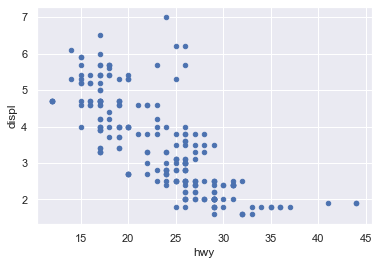

In [3]:
# 1. Simple scatter plot of hwy vs. displacment
df.plot.scatter('hwy', 'displ')
None

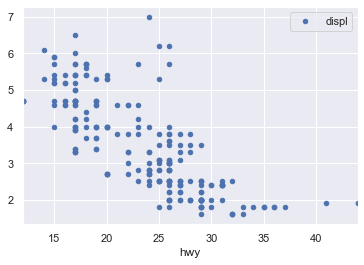

In [4]:
# alternative way of doing the same
df.plot('hwy', 'displ', style='.', ms=9);

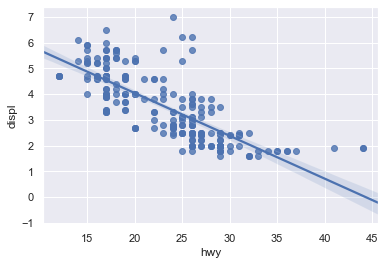

In [5]:
# Same plot as above, but draw in regression + CI
sns.regplot('hwy', 'displ', data=df)
None

# Map automobile class

In [6]:
# How many classes are there?
len(pd.unique(df['class']))

7

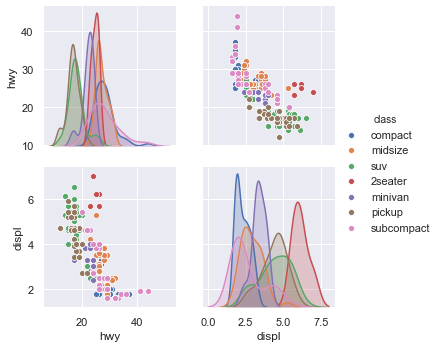

In [7]:
# How are the classes distributed in the data
pg = sns.pairplot(df[['hwy', 'displ', 'class']], hue='class')

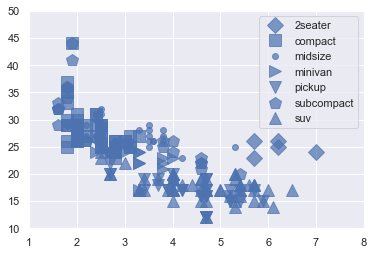

In [8]:
# 2. Map class to a unique shape/symbol
fig, ax = plt.subplots()
groups = df.groupby('class')
marker_dict = {'2seater': 'D', 'compact': 's', 'midsize': '.', 
               'minivan': '>', 'pickup': 'v', 'subcompact': 'p', 
               'suv': '^'}
for name, group in groups:
    ax.plot(group['displ'], group['hwy'], marker=marker_dict[name], linestyle='', 
            ms=12, alpha=0.7, label=name, color=sns.color_palette()[0])
ax.set_xlim([1, 8])
ax.set_ylim([10, 50])
_ = ax.legend()

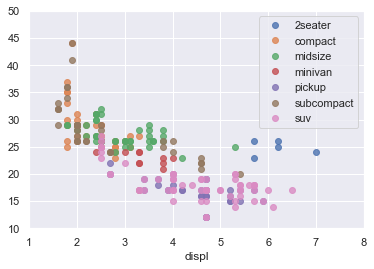

In [9]:
# 3. Map class to a unique color
fig, ax = plt.subplots()
groups = df.groupby('class')
for name, group in groups:
    group.plot('displ', 'hwy', marker='.', linestyle='', ms=12, label=name, alpha=0.8, ax=ax)
ax.set_xlim([1, 8])
ax.set_ylim([10, 50])
_ = ax.legend()

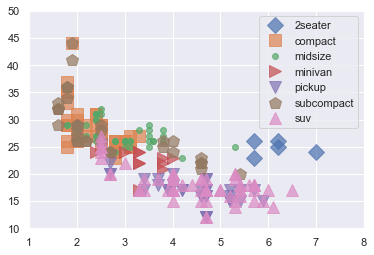

In [10]:
# 4. Map class to a color and symbol
fig, ax = plt.subplots()
groups = df.groupby('class')
marker_dict = {'2seater': 'D', 'compact': 's', 'midsize': '.', 
               'minivan': '>', 'pickup': 'v', 'subcompact': 'p', 
               'suv': '^'}
for name, group in groups:
    ax.plot(group['displ'], group['hwy'], marker=marker_dict[name], linestyle='', ms=12, alpha=0.7, label=name)
ax.set_xlim([1, 8])
ax.set_ylim([10, 50])
_ = ax.legend()

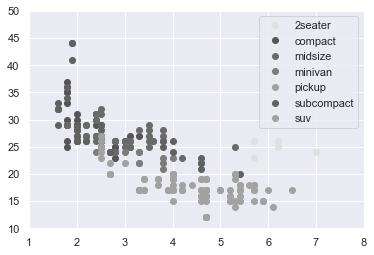

In [11]:
# 5. Brightness determined by mean displ for the class
from matplotlib.colors import rgb_to_hsv, hsv_to_rgb
groups = df.groupby('class')
for (idx, (name, group)) in enumerate(groups):
    size = group['displ'].mean()
    color = str(size / 7)
    plt.plot(group['displ'], group['hwy'], c=color, marker='.', linestyle='', ms=12, 
             label=name)
plt.xlim([1, 8])
plt.ylim([10, 50])
_ = plt.legend()

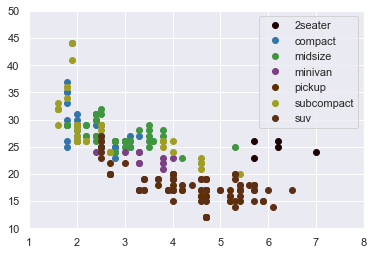

In [12]:
# 5-Alt1. Brightness determined by mean displ for the class applied by converting color to hsv
from matplotlib.colors import rgb_to_hsv, hsv_to_rgb
groups = df.groupby('class')
colors = sns.mpl_palette("Set1", 7)
for (idx, (name, group)) in enumerate(groups):
    c_hsv = rgb_to_hsv(colors[idx])
    brightness = 1 - (group['displ'].mean() / 7)
    c_hsv[2] = brightness
    c_rgb = hsv_to_rgb(c_hsv)
    plt.plot(group['displ'], group['hwy'], c=c_rgb, marker='.', linestyle='', ms=12, label=name)
plt.xlim([1, 8])
plt.ylim([10, 50])
_ = plt.legend()

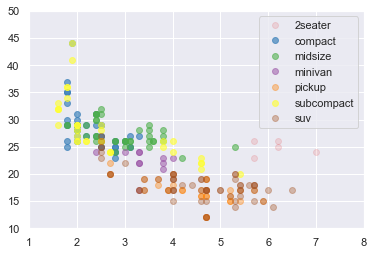

In [13]:
# 5-Alt2. Brightness determined by mean displ for the class applied using alpha
groups = df.groupby('class')
colors = sns.mpl_palette("Set1", 7)
for (idx, (name, group)) in enumerate(groups):
    alpha = 1-(group['displ'].mean() / 7)
    plt.plot(group['displ'], group['hwy'], c=colors[idx], marker='.', 
             linestyle='', ms=12, label=name, alpha=alpha)
plt.xlim([1, 8])
plt.ylim([10, 50])
_ = plt.legend()

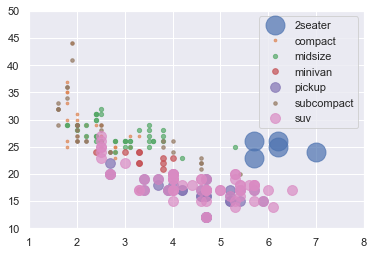

In [14]:
# 6. Size of shape is determined by mean displacement 
fig, ax = plt.subplots()
groups = df.groupby('class')
for name, group in groups:
    size = group['displ'].mean()
    size = size**2
    ax.plot(group['displ'], group['hwy'], marker='.', linestyle='', alpha=0.7, 
            ms=size, label=name)
ax.set_xlim([1, 8])
ax.set_ylim([10, 50])
_ = ax.legend()

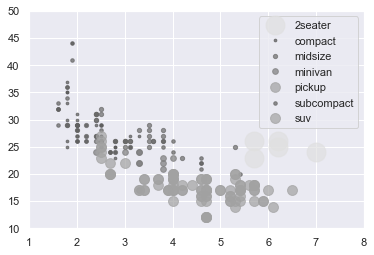

In [15]:
# 6-Alt. Size of shape and brightness is determined by mean displacement 
fig, ax = plt.subplots()
groups = df.groupby('class')
for name, group in groups:
    size = group['displ'].mean()
    color = str(size / 7)
    size = size**2
    ax.plot(group['displ'], group['hwy'], marker='.', linestyle='', alpha=0.7, 
            color=color, ms=size, label=name)
ax.set_xlim([1, 8])
ax.set_ylim([10, 50])
ax.legend();

# Mapping Extras

Were 1999 automobiles more or less efficient than 2008?

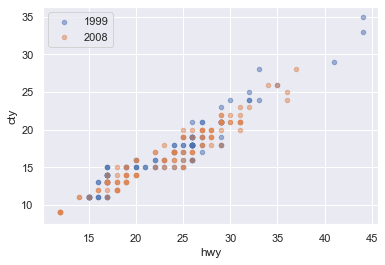

In [16]:
# 1. hwy vs. cty, year mapped to color
fig, ax = plt.subplots()
colors = sns.color_palette()
df_1999 = df[df['year'] == 1999]
df_1999.plot.scatter(x="hwy", y="cty", color=colors[0], ax=ax, alpha=0.5, label="1999")
df_2008 = df[df['year'] == 2008]
df_2008.plot.scatter(x="hwy", y="cty", color=colors[1], ax=ax, alpha=0.5, label="2008");

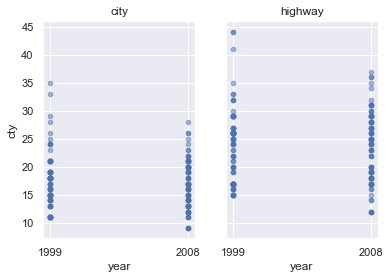

In [17]:
# 2. 
fig, axs = plt.subplots(1, 2, sharey=True)
ax=axs[0]
ax.set_title("city")
df.plot.scatter(x='year', y='cty', alpha=0.5, color=colors[0], ax=ax)
ax.set_xticks([1999, 2008]);
ax=axs[1]
ax.set_title("highway")
df.plot.scatter(x='year', y='hwy', alpha=0.5, color=colors[0], ax=ax)
ax.set_xticks([1999, 2008]);

# Faceting

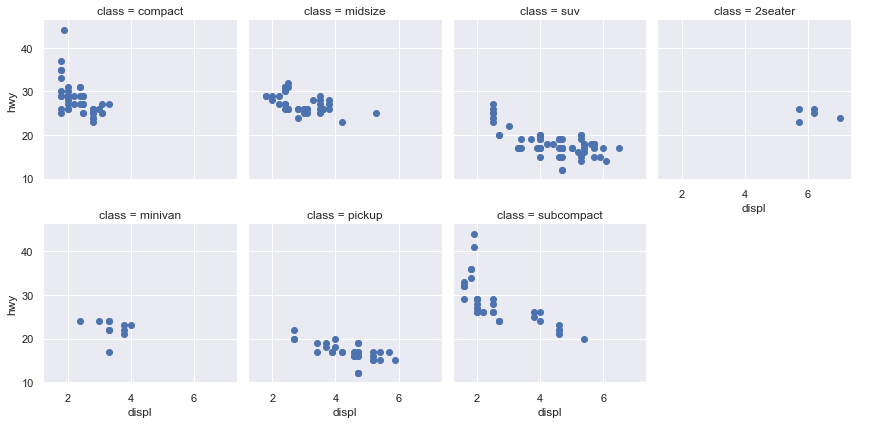

In [18]:
# 1. Facet by class, show displ vs hwy mpg -- using sns
g = sns.FacetGrid(df, col='class', col_wrap=4)
g.map(plt.scatter, 'displ', 'hwy')
_ = g.add_legend()

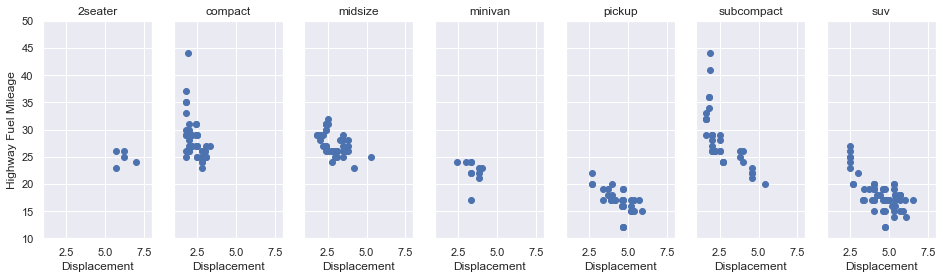

In [19]:
# 1. Facet by class, show displ vs hwy mpg -- using mpl
fig, axs = plt.subplots(1, 7, figsize=(16, 4), sharex=True, sharey=True)
groups = df.groupby('class')
index = 0
for name, group in groups:
    ax = axs[index]
    ax.plot(group['displ'], group['hwy'], marker='.', linestyle='', ms=12, label=name)
    ax.set_xlim([1, 8])
    ax.set_ylim([10, 50])
    ax.set_title(name)
    if index < 1:
        ax.yaxis.set_label_text('Highway Fuel Mileage')
    ax.xaxis.set_label_text('Displacement')
    index += 1

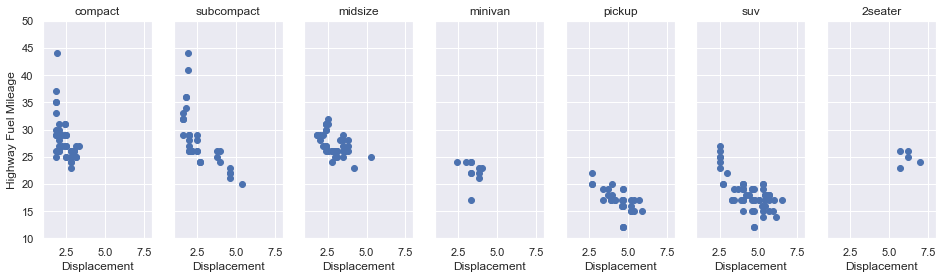

In [20]:
# 1. Facet by class, show displ vs hwy mpg, sort facets by mean displ
fig, axs = plt.subplots(1, 7, figsize=(16, 4), sharex=True, sharey=True)
groups = df.groupby('class')

mean_displ = df.groupby('class').mean()['displ'].sort_values()
class_to_index = {}
for cls, idx in zip(mean_displ.index, range(len(mean_displ.index))):
    class_to_index[cls] = idx
    
for name, group in groups:
    index = class_to_index[name]
    ax = axs[index]
    ax.plot(group['displ'], group['hwy'], marker='.', linestyle='', ms=12, label=name)
    ax.set_xlim([1, 8])
    ax.set_ylim([10, 50])
    ax.set_title(name)
    if index < 1:
        ax.yaxis.set_label_text('Highway Fuel Mileage')
    ax.xaxis.set_label_text('Displacement')

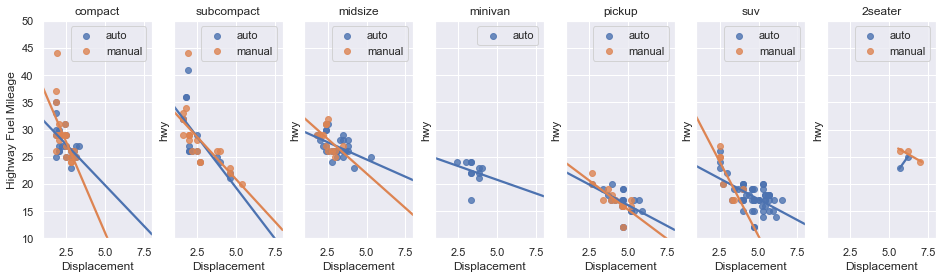

In [21]:
# 2. Facet by class, show displ vs hwy mpg, sort facets by mean displ, 
#    show regression per trans type

fig, axs = plt.subplots(1, 7, figsize=(16, 4), sharex=True, sharey=True)
groups = df.groupby('class')

# Sort by mean displacement
mean_displ = df.groupby('class').mean()['displ'].sort_values()
class_to_index = {}
for cls, idx in zip(mean_displ.index, range(len(mean_displ.index))):
    class_to_index[cls] = idx

# Assign a color for each transmittion type
trans_type_to_color = {t:c for t, c in zip(pd.unique(df.trans_type), sns.color_palette())}

for name, group in groups:
    index = class_to_index[name]
    ax = axs[index]
    for sgname, sg in group.groupby('trans_type'):
        sns.regplot(x='displ', y='hwy', data=sg, ax=ax, label=sgname, ci=None, 
                    color=trans_type_to_color[sgname])
    ax.set_xlim([1, 8])
    ax.set_ylim([10, 50])
    ax.set_title(name)
    ax.legend()
    if index < 1:
        ax.yaxis.set_label_text('Highway Fuel Mileage')
    ax.xaxis.set_label_text('Displacement')
fig.set_size_inches(16, 4)


# Transforming

## Burtin data &mdash; unstructured data frame

In [22]:
df = pd.read_json('../data/burtin.json', orient='records')

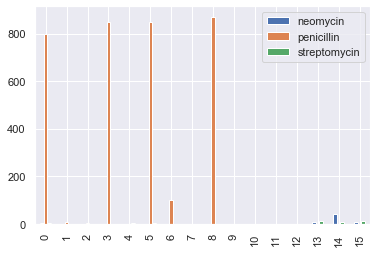

In [23]:
# 1. Bar plot, no transform
_ = df.plot.bar()

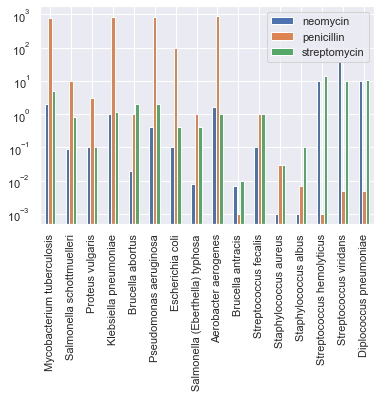

In [24]:
# 2. Bar plot, with log transform applied to scale
ax = df.plot.bar(log=True)
ax.set_xticklabels(df['bacteria'])
None

In [25]:
# 2 (alt) Apply log transform to data...
for name in df.columns:
    if name == 'bacteria' or name == 'gram':
        continue
    df[name] = df[name].apply(np.log)
df.head()

,bacteria,gram,neomycin,penicillin,streptomycin
0,Mycobacterium tuberculosis,negative,0.693147,6.684612,1.609438
1,Salmonella schottmuelleri,negative,-2.407946,2.302585,-0.223144
2,Proteus vulgaris,negative,-2.302585,1.098612,-2.302585
3,Klebsiella pneumoniae,negative,0.000000,6.745236,0.182322
4,Brucella abortus,negative,-3.912023,0.000000,0.693147


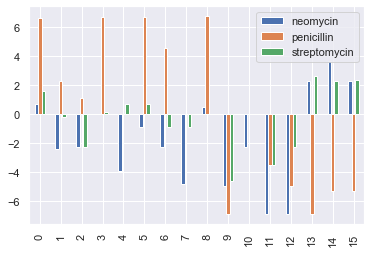

In [26]:
# 2 (alt) ... and plot
_ = df.plot.bar()

## Burtin data &mdash; structured data frame &mdash; bar plot

In [27]:
df = pd.read_json('../data/burtin.json', orient='records')
df = df.set_index(['bacteria', 'gram']).stack().reset_index()
# ld = lethal dosage
df.columns = ['bacteria', 'gram', 'antibiotic', 'ld']
# efficacy is the inverse of dosage (the lower the ld, the more effective)
df['efficacy'] = np.reciprocal(df['ld'])
df['lefficacy'] = np.log(df['efficacy'])
# assign an id to each bacterium
bid_dict = {b:i for i, b in enumerate(sorted(pd.unique(df['bacteria'])))}
df['bid'] = df.apply(lambda x: bid_dict[x['bacteria']], 1)
df['genus'] = df['bacteria'].apply(lambda x: x.split(" ")[0])
df.head()

,bacteria,gram,antibiotic,ld,efficacy,lefficacy,bid,genus
0,Mycobacterium tuberculosis,negative,neomycin,2.00,0.500000,-0.693147,6,Mycobacterium
1,Mycobacterium tuberculosis,negative,penicillin,800.00,0.001250,-6.684612,6,Mycobacterium
2,Mycobacterium tuberculosis,negative,streptomycin,5.00,0.200000,-1.609438,6,Mycobacterium
3,Salmonella schottmuelleri,negative,neomycin,0.09,11.111111,2.407946,10,Salmonella
4,Salmonella schottmuelleri,negative,penicillin,10.00,0.100000,-2.302585,10,Salmonella


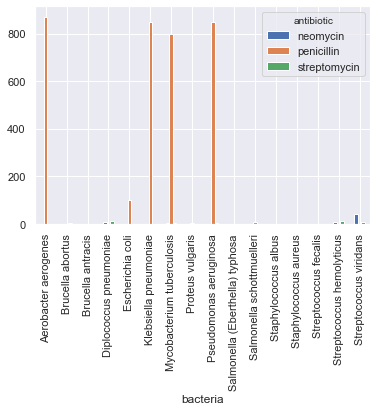

In [28]:
# 1. Bar plot, no transformation
df.set_index(['bacteria', 'antibiotic']).unstack()['ld'].plot.bar()
None

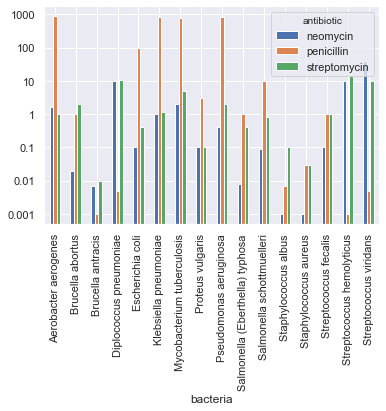

In [29]:
# 2. Bar plot, log transformed
ax = df.set_index(['bacteria', 'antibiotic']).unstack()['ld'].plot.bar(log=True)
ax.set_yticklabels(["{:.4g}".format(tick) for tick in ax.get_yticks()])
None

## Burtin data &mdash; structured data frame &mdash; heatmap

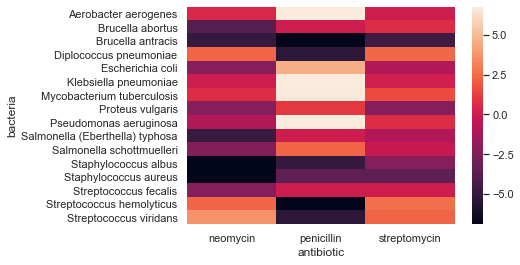

In [30]:
# 1. Heatmap of log dosage
tdf = df[['bacteria', 'antibiotic', 'ld']]
tdf = tdf.set_index(['bacteria', 'antibiotic']).unstack()['ld']
_ = sns.heatmap(np.log(tdf))

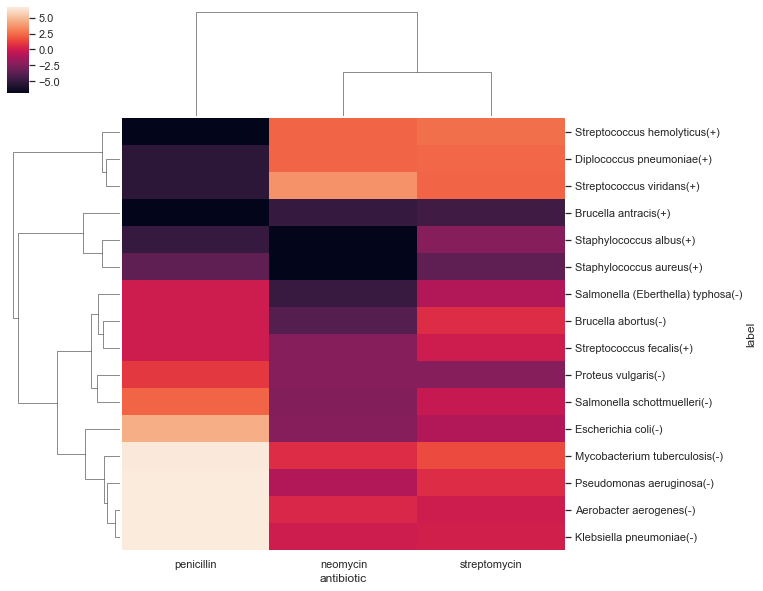

In [31]:
# 2. Clustermap of dosage
def row_label(row):
    mark = "+" if row.gram == 'positive' else "-"
    return "{}({})".format(row.bacteria, mark)
tdf = pd.DataFrame(df, copy=True)
tdf['label'] = tdf.apply(row_label, axis=1)
tdf = tdf.set_index(['label', 'antibiotic'])
tdf = tdf['ld'].unstack()
_ = sns.clustermap(np.log(tdf))

# Extra: Invert Scale

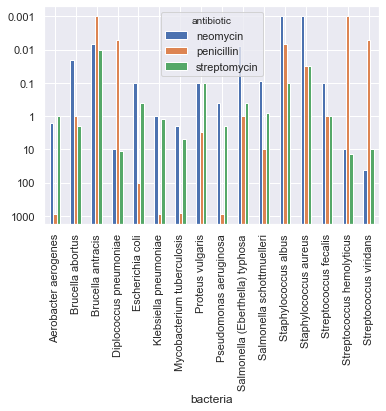

In [32]:
# 1. Extra: Bar plot, log transformed and inverted
ax = np.reciprocal(df.set_index(['bacteria', 'antibiotic']).unstack()['ld']).plot.bar(log=True)
ax.set_yticklabels(reversed(["{:.4g}".format(tick) for tick in ax.get_yticks()]))
None

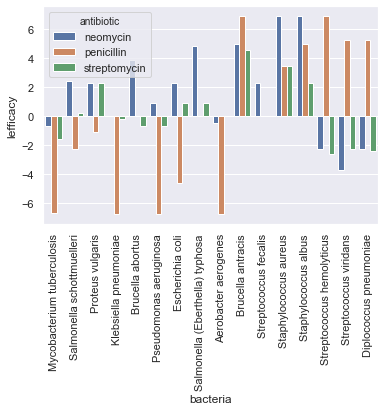

In [33]:
# 1. Extra alternative, plot log efficacy instead of dosage
ax = sns.barplot(x="bacteria", y="lefficacy", hue="antibiotic", orient="v", data=df)
locs, labels = plt.xticks()
_ = plt.setp(labels, rotation=90)

# Extra: Quantized Heatmap & Colormap

In [34]:
# Data for heatmap of quantized dosage
df = pd.read_json('../data/burtin.json', orient='records')
df = df.set_index(['bacteria', 'gram']).stack().reset_index()
df.columns = ['bacteria', 'gram', 'antibiotic', 'ld']
num_bins = 4
ser, bins = pd.qcut(df['ld'], num_bins, labels=False, retbins=True)
df['ld_cat'] = ser
df.head()

,bacteria,gram,antibiotic,ld,ld_cat
0,Mycobacterium tuberculosis,negative,neomycin,2.00,2
1,Mycobacterium tuberculosis,negative,penicillin,800.00,3
2,Mycobacterium tuberculosis,negative,streptomycin,5.00,2
3,Salmonella schottmuelleri,negative,neomycin,0.09,1
4,Salmonella schottmuelleri,negative,penicillin,10.00,3


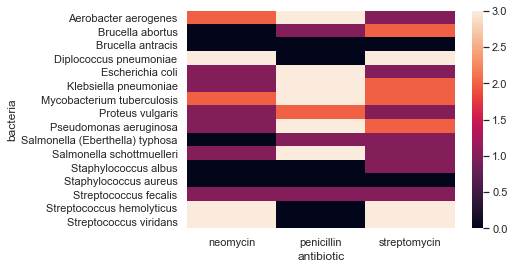

In [35]:
# 2. Heatmap of quantized dosage
tdf = df.set_index(['bacteria', 'antibiotic'])
tdf = tdf['ld_cat'].unstack()
_ = sns.heatmap(tdf)

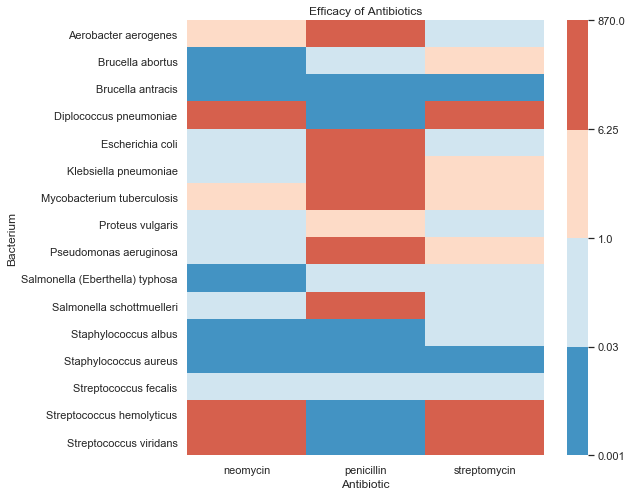

In [36]:
# 3. Heatmap of quantized dosage with colormap quantized and labels in dosage values
bounds = range(len(bins))
ncolors = num_bins
cmap = mpl.colors.ListedColormap(sns.color_palette("RdBu_r", ncolors))
norm = mpl.colors.BoundaryNorm(boundaries=bounds, ncolors=ncolors)
cbar_ticks = mpl.ticker.MaxNLocator(ncolors)
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(tdf, cmap=cmap, norm=norm,
            vmin=tdf.min().min(), vmax=tdf.max().max(),
            robust=False, 
            cbar_kws={'ticks' : cbar_ticks},
            ax=ax)
ax.set_ylabel("Bacterium")
ax.set_xlabel("Antibiotic")
ax.set_title("Efficacy of Antibiotics")
cbar = ax.collections[0].colorbar
cbar.set_ticks(bounds)
cbar.set_ticklabels(bins)

In [37]:
def row_label(row):
    mark = "+" if row.gram == 'positive' else "-"
    return "{}({})".format(row.bacteria, mark)
tdf = pd.DataFrame(df, copy=True)
tdf['label'] = tdf.apply(row_label, axis=1)
tdf = tdf.set_index(['label', 'antibiotic'])
tdf = tdf['ld_cat'].unstack()
tdf.head()

antibiotic,neomycin,penicillin,streptomycin
label,,,
Aerobacter aerogenes(-),2,3,1
Brucella abortus(-),0,1,2
Brucella antracis(+),0,0,0
Diplococcus pneumoniae(+),3,0,3
Escherichia coli(-),1,3,1


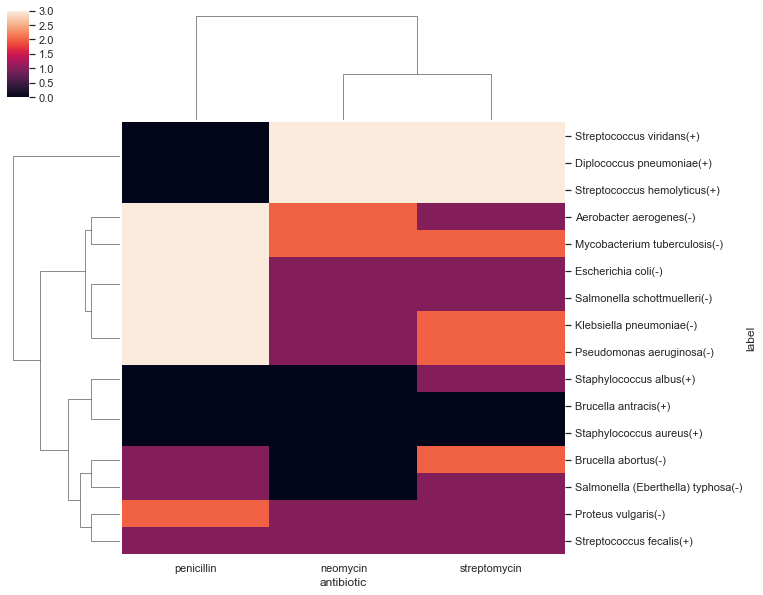

In [38]:
# 2. Clustermap of quantized dosage
def row_label(row):
    mark = "+" if row.gram == 'positive' else "-"
    return "{}({})".format(row.bacteria, mark)
tdf = pd.DataFrame(df, copy=True)
tdf['label'] = tdf.apply(row_label, axis=1)
tdf = tdf.set_index(['label', 'antibiotic'])
tdf = tdf['ld_cat'].unstack()
_ = sns.clustermap(tdf)

## Extra: Quantizing SNB-data heatmap

In [39]:
df = pd.read_csv("../data/snb-data-rendoblim-en-all-20170502_1430.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index(['Date', 'D0'], inplace=True)
df.sort_index(inplace=True)
df = df.unstack()['Value']
cols = ["{}J".format(idx) for idx in range(1, 11)]
cols.extend(['20J', '30J'])
df = df[cols]
df.columns.name='Yield'
df.head()

Yield,1J,2J,3J,4J,5J,6J,7J,8J,9J,10J,20J,30J
Date,,,,,,,,,,,,
1988-01-01,2.887,3.218,3.393,3.554,3.695,3.810,3.904,3.980,4.041,4.092,4.326,NaN
1988-02-01,2.638,2.990,3.271,3.498,3.672,3.804,3.905,3.984,4.047,4.098,4.332,NaN
1988-03-01,2.641,3.263,3.573,3.734,3.823,3.878,3.916,3.946,3.972,3.998,4.255,NaN
1988-04-01,2.800,3.250,3.467,3.594,3.684,3.757,3.819,3.874,3.923,3.965,4.200,NaN
1988-05-01,3.191,3.602,3.802,3.909,3.974,4.019,4.054,4.082,4.106,4.127,4.247,NaN


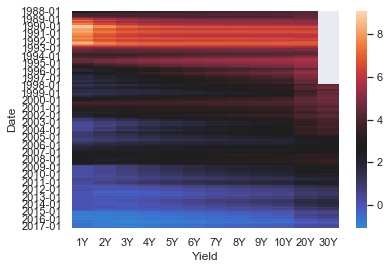

In [40]:
ylabels = [t.strftime("%Y-%m") if i%12 == 0 else "" for i, t in enumerate(df.index)]
xlabels = ["{}Y".format(c[0:-1]) for c in df.columns]
_ = sns.heatmap(df, xticklabels=xlabels, yticklabels=ylabels, center=df.unstack().mean())

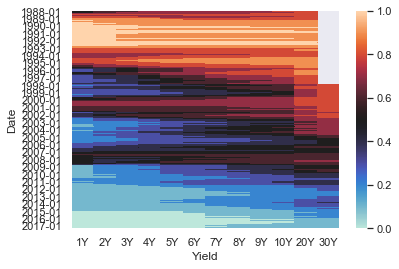

In [41]:
ser = df.stack()
rser = ser.rank(pct=True).round(1)
tdf = rser.unstack()
ylabels = [t.strftime("%Y-%m") if i%12 == 0 else "" for i, t in enumerate(df.index)]
xlabels = ["{}Y".format(c[0:-1]) for c in df.columns]
_ = sns.heatmap(tdf, xticklabels=xlabels, yticklabels=ylabels, center=0.5)

In [42]:
(df.min().min(), df.max().max())

(-1.09468249, 9.093)

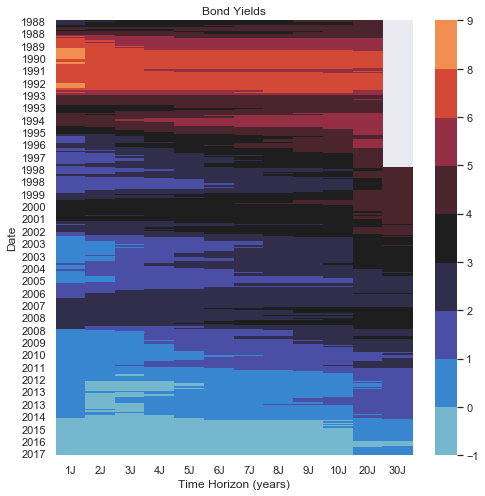

In [43]:
bounds = np.array([-1, 0, 1, 2, 3, 4, 5, 6, 8, 9])
ncolors = len(bounds) - 1
cmap = mpl.colors.ListedColormap(sns.color_palette("icefire", ncolors))
norm = mpl.colors.BoundaryNorm(boundaries=bounds, ncolors=ncolors)
cbar_ticks = mpl.ticker.MaxNLocator(ncolors)
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(df, cmap=cmap, norm=norm,
            vmin=df.min().min(), vmax=df.max().max(),
            yticklabels=10, robust=False, 
            cbar_kws={'ticks' : cbar_ticks},
            ax=ax)
ax.set_yticklabels([t.get_text()[0:4] for t in ax.get_yticklabels()])
ax.set_ylabel("Date")
ax.set_xlabel("Time Horizon (years)")
ax.set_title("Bond Yields")
cbar = ax.collections[0].colorbar
cbar_ticks = bounds
cbar.set_ticks(cbar_ticks)

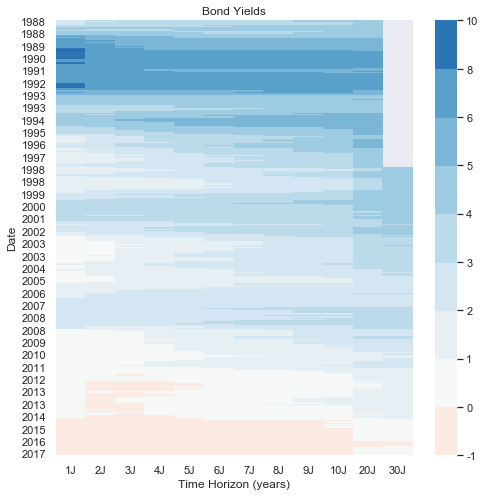

In [44]:
bounds = np.array([-1, 0, 1, 2, 3, 4, 5, 6, 8, 10])
ncolors = len(bounds)
cmap = mpl.colors.ListedColormap(sns.color_palette("RdBu", ncolors*2 + 1)[ncolors-1:])
norm = mpl.colors.BoundaryNorm(boundaries=bounds, ncolors=ncolors)
cbar_ticks = mpl.ticker.MaxNLocator(ncolors)
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(df, cmap=cmap, norm=norm,
            vmin=df.min().min(), vmax=df.max().max(),
            yticklabels=10, robust=False, 
            cbar_kws={'ticks' : cbar_ticks},
            ax=ax)
ax.set_yticklabels([t.get_text()[0:4] for t in ax.get_yticklabels()])
ax.set_ylabel("Date")
ax.set_xlabel("Time Horizon (years)")
ax.set_title("Bond Yields")
cbar = ax.collections[0].colorbar
cbar_ticks = bounds
cbar.set_ticks(cbar_ticks)
cbar.set_ticklabels(cbar_ticks)

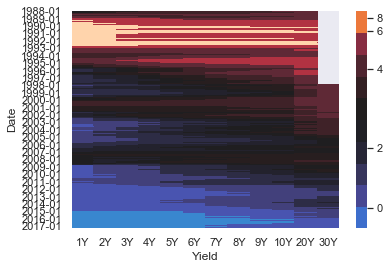

In [45]:
ser = df.stack()
rser = ser.rank(pct=True)
qser = rser.round(1).apply(lambda x: ser.quantile(x))
tdf = qser.unstack()
ylabels = [t.strftime("%Y-%m") if i%12 == 0 else "" for i, t in enumerate(df.index)]
xlabels = ["{}Y".format(c[0:-1]) for c in df.columns]
bounds = ser.quantile(np.array(range(0, 11)) / 10)
cbar_kws = {'boundaries': bounds}
sns.heatmap(tdf, xticklabels=xlabels, yticklabels=ylabels, center=ser.mean(), cbar_kws=cbar_kws)
None

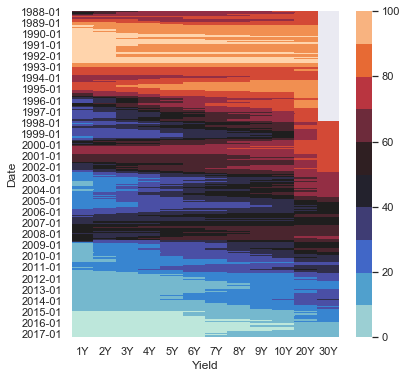

In [46]:
ser = df.stack()
rser = ser.rank(pct=True)
tdf = ((rser * 10).round() * 10).unstack()
ylabels = [t.strftime("%Y-%m") if i%12 == 0 else "" for i, t in enumerate(df.index)]
xlabels = ["{}Y".format(c[0:-1]) for c in df.columns]
bounds = np.array(range(0, 11)) * 10
cbar_kws = {'boundaries': bounds}
sns.heatmap(tdf, xticklabels=xlabels, yticklabels=ylabels, center=50, cbar_kws=cbar_kws)
plt.gcf().set_size_inches(6, 6)